In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames
from datetime import datetime
import time
import sys
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from scipy.stats import uniform
from scipy.stats.distributions import randint
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.optimize import minimize

# Pretty display for notebooks
%matplotlib inline

# Set figure aesthetics
sns.set_style("white", {'ytick.major.size': 8.0})
sns.set_context("poster", font_scale=0.8)


In [3]:
#Read the data
data_train=pd.read_csv('../train_ZoGVYWq.csv', index_col=0)
data_test=pd.read_csv('../test_66516Ee.csv', index_col=0)
data_train_len=data_train.shape[0]
data_test_len=data_test.shape[0]

In [4]:
print('Number of rows, columns in training set: '+ str(data_train.shape))
print('Number of rows, columns in test set: ' + str(data_test.shape))
display(data_train.T)
display(data_test.T)

Number of rows, columns in training set: (79853, 12)
Number of rows, columns in test set: (34224, 11)


id,110936,41492,31300,19415,99379,59951,54031,94290,93730,84844,...,84628,11262,25366,104705,91081,48057,59012,77050,67225,71531
perc_premium_paid_by_cash_credit,0.429,0.01,0.917,0.049,0.052,0.54,1,1,0.621,0.908,...,0.454,0.994,0.825,0.118,0.033,0.425,0.704,0,0.398,0.55
age_in_days,12058,21546,17531,15341,31400,17527,24829,21911,9868,23008,...,25928,20445,14979,22275,18265,23367,19356,23372,22641,15709
Income,355060,315150,84140,250510,198680,282080,118400,180240,92520,107180,...,70800,186830,360060,195070,301540,224550,279150,305020,39330,280140
Count_3-6_months_late,0,0,2,0,0,2,0,1,0,2,...,0,0,2,0,0,1,1,0,0,1
Count_6-12_months_late,0,0,3,0,0,0,0,6,0,0,...,0,0,0,0,0,0,0,0,0,0
Count_more_than_12_months_late,0,0,1,0,0,0,0,4,0,0,...,0,0,0,0,0,0,1,0,0,1
application_underwriting_score,99.02,99.89,98.69,99.57,99.87,99.18,99.05,99.33,99.58,98.91,...,98.19,99.67,98.61,99.25,99.89,98.7,99.42,98.89,98.68,99.84
no_of_premiums_paid,13,21,7,9,12,9,11,3,4,11,...,7,5,10,11,4,19,12,12,8,8
sourcing_channel,C,A,C,A,B,B,B,A,A,A,...,A,A,D,A,A,B,A,A,A,A
residence_area_type,Urban,Urban,Rural,Urban,Urban,Rural,Urban,Urban,Urban,Rural,...,Urban,Urban,Urban,Urban,Rural,Urban,Rural,Rural,Rural,Urban


id,649,81136,70762,53935,15476,64797,67412,44241,5069,16615,...,24582,79939,63759,63725,37116,81988,30326,65749,65686,93826
perc_premium_paid_by_cash_credit,0.001,0.124,1,0.198,0.041,0.112,0.325,0.362,0.115,0.021,...,0.711,0.442,0.185,0.975,0.522,0.227,0.157,0.325,0.983,0.005
age_in_days,27384,23735,17170,16068,10591,16065,17167,20085,23008,21906,...,16803,23739,14244,15341,17894,20810,19353,18264,16798,24467
Income,51150,285140,186030,123540,200020,245130,388050,99880,360040,510040,...,127570,40840,35920,36110,445000,110240,125090,196570,212150,89190
Count_3-6_months_late,0,0,0,0,1,0,6,3,0,0,...,0,0,0,1,0,0,0,0,1,1
Count_6-12_months_late,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Count_more_than_12_months_late,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
application_underwriting_score,99.89,98.93,NaN,99,99.17,98.88,99,98.4,99.88,99.89,...,99.1,97.51,99.88,99.6,99.42,97.52,99.62,98.58,98.88,98
no_of_premiums_paid,7,19,2,11,14,7,27,14,6,11,...,4,8,4,5,6,9,7,14,10,11
sourcing_channel,A,A,B,B,A,B,C,A,D,B,...,A,A,C,A,D,A,A,B,A,A
residence_area_type,Rural,Urban,Urban,Rural,Rural,Rural,Urban,Urban,Rural,Urban,...,Rural,Urban,Urban,Rural,Rural,Urban,Rural,Rural,Urban,Urban


In [5]:
# Separating labels
target=data_train.renewal
data_train = data_train.drop(['renewal'], axis=1)

# Combining train and test dataset for cleaning
data = pd.concat((data_train, data_test), axis=0, ignore_index=True)

print('Number of rows, columns in combined dataset: ' + str(data.shape))

Number of rows, columns in combined dataset: (114077, 11)


In [6]:
display(data.T)

,0,1,2,3,4,5,6,7,8,9,...,114067,114068,114069,114070,114071,114072,114073,114074,114075,114076
perc_premium_paid_by_cash_credit,0.429,0.01,0.917,0.049,0.052,0.54,1,1,0.621,0.908,...,0.711,0.442,0.185,0.975,0.522,0.227,0.157,0.325,0.983,0.005
age_in_days,12058,21546,17531,15341,31400,17527,24829,21911,9868,23008,...,16803,23739,14244,15341,17894,20810,19353,18264,16798,24467
Income,355060,315150,84140,250510,198680,282080,118400,180240,92520,107180,...,127570,40840,35920,36110,445000,110240,125090,196570,212150,89190
Count_3-6_months_late,0,0,2,0,0,2,0,1,0,2,...,0,0,0,1,0,0,0,0,1,1
Count_6-12_months_late,0,0,3,0,0,0,0,6,0,0,...,0,0,0,0,0,0,0,0,0,0
Count_more_than_12_months_late,0,0,1,0,0,0,0,4,0,0,...,0,0,0,1,0,0,0,0,1,0
application_underwriting_score,99.02,99.89,98.69,99.57,99.87,99.18,99.05,99.33,99.58,98.91,...,99.1,97.51,99.88,99.6,99.42,97.52,99.62,98.58,98.88,98
no_of_premiums_paid,13,21,7,9,12,9,11,3,4,11,...,4,8,4,5,6,9,7,14,10,11
sourcing_channel,C,A,C,A,B,B,B,A,A,A,...,A,A,C,A,D,A,A,B,A,A
residence_area_type,Urban,Urban,Rural,Urban,Urban,Rural,Urban,Urban,Urban,Rural,...,Rural,Urban,Urban,Rural,Rural,Urban,Rural,Rural,Urban,Urban


In [7]:
target.value_counts()

1    74855
0     4998
Name: renewal, dtype: int64

In [8]:
#Statistical analysis of data
print('Statistical analysis of data:\n')
display(data.describe().T)

Statistical analysis of data:



,count,mean,std,min,25%,50%,75%,max
perc_premium_paid_by_cash_credit,114077.0,0.314339,0.334657,0.0,0.034,0.168,0.539,1.00
age_in_days,114077.0,18839.952260,5220.077279,7670.0,14974.000,18625.000,22636.000,37602.00
Income,114077.0,207039.010405,441058.113468,24030.0,107560.000,165240.000,250450.000,90262600.00
Count_3-6_months_late,113949.0,0.245689,0.689892,0.0,0.000,0.000,0.000,13.00
Count_6-12_months_late,113949.0,0.078948,0.442024,0.0,0.000,0.000,0.000,17.00
Count_more_than_12_months_late,113949.0,0.059439,0.310538,0.0,0.000,0.000,0.000,11.00
application_underwriting_score,109780.0,99.065675,0.740743,91.9,98.810,99.210,99.530,99.89
no_of_premiums_paid,114077.0,10.871850,5.184576,2.0,7.000,10.000,14.000,60.00
premium,114077.0,10897.570939,9360.360230,1200.0,5400.000,7500.000,13800.000,60000.00


In [9]:
data.dtypes

perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
premium                               int64
dtype: object

In [10]:
def find_missing_data(df):
    #=======
    #finds amount and percentage of missing data in a dataframe 'df' 
    #and sorts the result in descending order
    #=======
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    return total, percent

In [11]:
#missing data
total,percent=find_missing_data(data)
total_train,percent_train=find_missing_data(data_train)
total_test,percent_test=find_missing_data(data_test)
missing_data = pd.concat([total, percent, total_train, percent_train, total_test, percent_test], axis=1, \
                         keys=['total', 'percent','total_train', 'percent_train','total_test', 'percent_test'])
missing_data.sort_values('total',ascending=False)

,total,percent,total_train,percent_train,total_test,percent_test
application_underwriting_score,4297,0.037668,2974,0.037243,1323,0.038657
Count_more_than_12_months_late,128,0.001122,97,0.001215,31,0.000906
Count_6-12_months_late,128,0.001122,97,0.001215,31,0.000906
Count_3-6_months_late,128,0.001122,97,0.001215,31,0.000906
premium,0,0.000000,0,0.000000,0,0.000000
residence_area_type,0,0.000000,0,0.000000,0,0.000000
sourcing_channel,0,0.000000,0,0.000000,0,0.000000
no_of_premiums_paid,0,0.000000,0,0.000000,0,0.000000
Income,0,0.000000,0,0.000000,0,0.000000
age_in_days,0,0.000000,0,0.000000,0,0.000000


In [12]:
missing_columns=missing_data[missing_data.total>0].index.tolist()

In [13]:
#filling missing data with median
for col in missing_columns:
    data[col].fillna(data[col].median(), inplace=True)
    data[col]=data[col].astype('int')

In [14]:
data.isnull().sum().max() #just checking that there's no missing data missing...

0

In [15]:
#changing type of columns with filled missing data to 'int'
for col in missing_columns:
    data[col]=data[col].astype('int')

In [16]:
numerical_columns=data.select_dtypes(include=[np.number]).columns.tolist()
display(numerical_columns)

['perc_premium_paid_by_cash_credit',
 'age_in_days',
 'Income',
 'Count_3-6_months_late',
 'Count_6-12_months_late',
 'Count_more_than_12_months_late',
 'application_underwriting_score',
 'no_of_premiums_paid',
 'premium']

In [17]:
int_columns=[col for col in numerical_columns if 'Count' in col]
print(int_columns)

['Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late']


C:\Users\lukas.keller\Documents\DS\venv\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\lukas.keller\Documents\DS\venv\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\lukas.keller\Documents\DS\venv\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\lukas.keller\Documents\DS\venv\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users

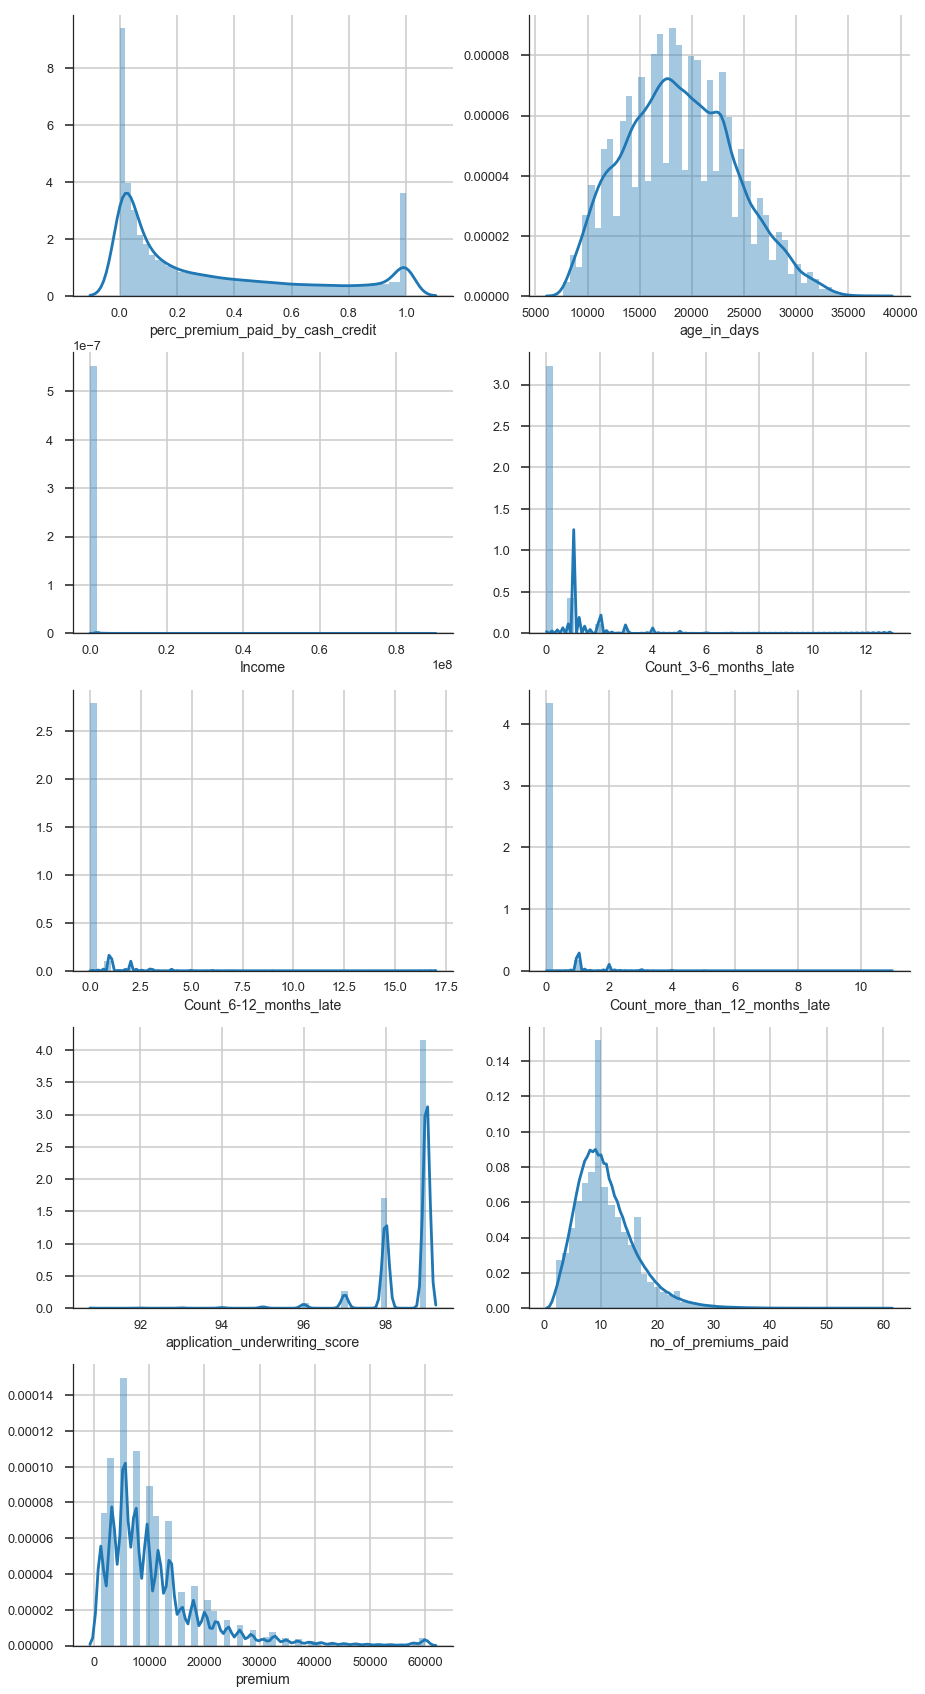

In [18]:
#plt.rcParams["figure.figsize"] = (20,10)
#plt.rcParams['agg.path.chunksize'] = 10000
# Create figure
fig = plt.figure(figsize = (15,30));

for i in range(len(numerical_columns)):
    fig.add_subplot(5, 2, i+1)
    sns.distplot(data[numerical_columns[i]])
    plt.grid()
    #plt.title(numerical_columns[i])
    plt.show
    sns.despine()

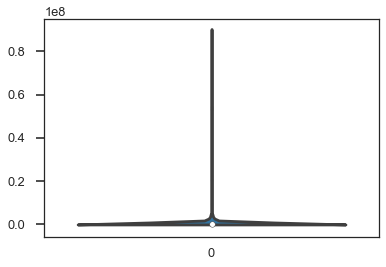

In [19]:
sns.violinplot(data=data.Income);

'Income' data is skewed. Let's apply logarithmic transformation to it.

In [20]:
data.Income=data.Income.apply(lambda x: np.log(x + 1))

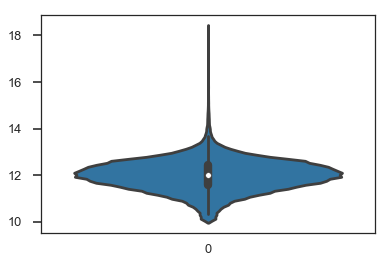

In [21]:
sns.violinplot(data=data.Income);

C:\Users\lukas.keller\Documents\DS\venv\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


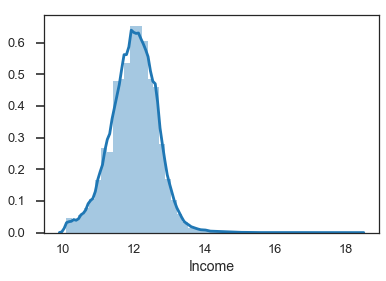

In [22]:
sns.distplot(data.Income)
plt.show()

In [23]:
#normalizing numerical data 
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [24]:
# Show an example of a record with scaling applied
display(data.head(n = 10).T)

,0,1,2,3,4,5,6,7,8,9
perc_premium_paid_by_cash_credit,0.429,0.01,0.917,0.049,0.052,0.54,1,1,0.621,0.908
age_in_days,0.146599,0.463584,0.329447,0.256281,0.792797,0.329313,0.573266,0.475778,0.0734331,0.512428
Income,0.327166,0.31268,0.152245,0.284792,0.25663,0.299211,0.193744,0.244796,0.163779,0.181649
Count_3-6_months_late,0,0,0.153846,0,0,0.153846,0,0.0769231,0,0.153846
Count_6-12_months_late,0,0,0.176471,0,0,0,0,0.352941,0,0
Count_more_than_12_months_late,0,0,0.0909091,0,0,0,0,0.363636,0,0
application_underwriting_score,1,1,0.875,1,1,1,1,1,1,0.875
no_of_premiums_paid,0.189655,0.327586,0.0862069,0.12069,0.172414,0.12069,0.155172,0.0172414,0.0344828,0.155172
sourcing_channel,C,A,C,A,B,B,B,A,A,A
residence_area_type,Urban,Urban,Rural,Urban,Urban,Rural,Urban,Urban,Urban,Rural


In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
perc_premium_paid_by_cash_credit,114077.0,0.314339,0.334657,0.0,0.034000,0.168000,0.539000,1.0
age_in_days,114077.0,0.373178,0.174398,0.0,0.244020,0.365996,0.500000,1.0
Income,114077.0,0.232468,0.079936,0.0,0.182079,0.234240,0.284763,1.0
Count_3-6_months_late,114077.0,0.018878,0.053043,0.0,0.000000,0.000000,0.000000,1.0
Count_6-12_months_late,114077.0,0.004639,0.025987,0.0,0.000000,0.000000,0.000000,1.0
Count_more_than_12_months_late,114077.0,0.005397,0.028215,0.0,0.000000,0.000000,0.000000,1.0
application_underwriting_score,114077.0,0.945839,0.093473,0.0,0.875000,1.000000,1.000000,1.0
no_of_premiums_paid,114077.0,0.152963,0.089389,0.0,0.086207,0.137931,0.206897,1.0
premium,114077.0,0.164925,0.159190,0.0,0.071429,0.107143,0.214286,1.0


C:\Users\lukas.keller\Documents\DS\venv\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\lukas.keller\Documents\DS\venv\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\lukas.keller\Documents\DS\venv\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\lukas.keller\Documents\DS\venv\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users

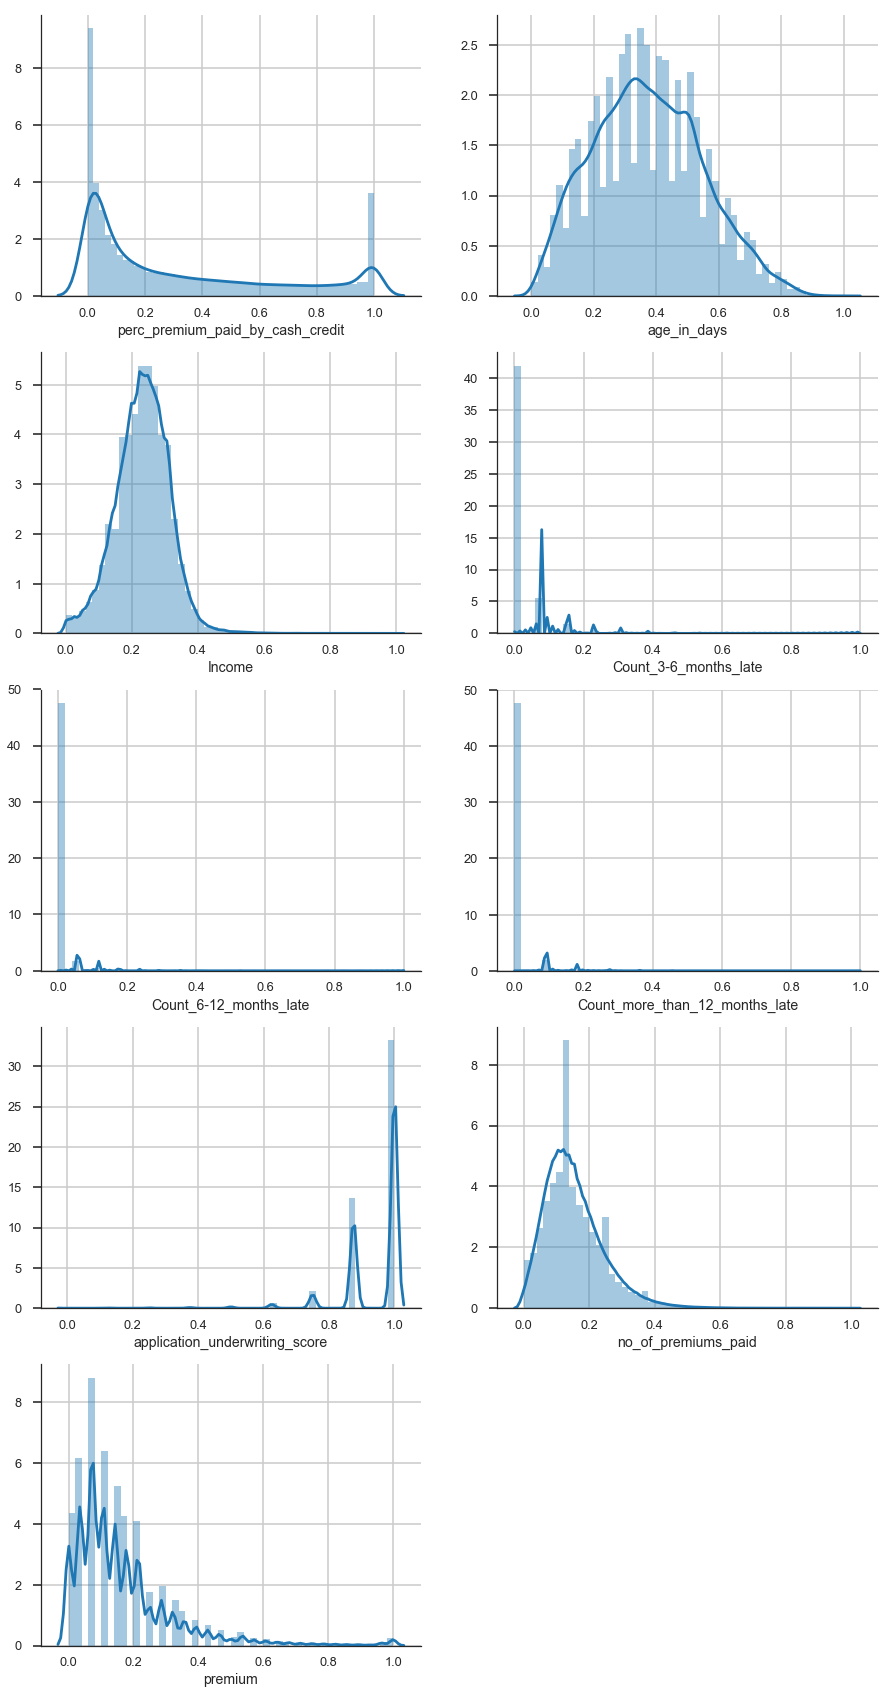

In [26]:
fig = plt.figure(figsize = (15,30));

for i in range(len(numerical_columns)):
    fig.add_subplot(5, 2, i+1)
    sns.distplot(data[numerical_columns[i]])
    plt.grid()
    #plt.title(numerical_columns[i])
    plt.show
    sns.despine()

In [27]:
#One-hot-encoding features
ohe_features = ['sourcing_channel', 'residence_area_type']

for f in ohe_features:
    data_dummy = pd.get_dummies(data[f], prefix=f)
    data = data.drop([f], axis=1)
    data = pd.concat((data, data_dummy), axis=1)

In [28]:
print('Dataset after OHE contains {} rows and {} columns.'.format(data.shape[0], data.shape[1]))

Dataset after OHE contains 114077 rows and 16 columns.


In [29]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,114067,114068,114069,114070,114071,114072,114073,114074,114075,114076
perc_premium_paid_by_cash_credit,0.429000,0.010000,0.917000,0.049000,0.052000,0.540000,1.000000,1.000000,0.621000,0.908000,...,0.711000,0.442000,0.185000,0.975000,0.522000,0.227000,0.157000,0.325000,0.983000,0.005000
age_in_days,0.146599,0.463584,0.329447,0.256281,0.792797,0.329313,0.573266,0.475778,0.073433,0.512428,...,0.305125,0.536850,0.219631,0.256281,0.341574,0.438995,0.390318,0.353936,0.304958,0.561172
Income,0.327166,0.312680,0.152245,0.284792,0.256630,0.299211,0.193744,0.244796,0.163779,0.181649,...,0.202807,0.064431,0.048836,0.049477,0.354597,0.185069,0.200422,0.255333,0.264599,0.159326
Count_3-6_months_late,0.000000,0.000000,0.153846,0.000000,0.000000,0.153846,0.000000,0.076923,0.000000,0.153846,...,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.076923,0.076923
Count_6-12_months_late,0.000000,0.000000,0.176471,0.000000,0.000000,0.000000,0.000000,0.352941,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Count_more_than_12_months_late,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.363636,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000
application_underwriting_score,1.000000,1.000000,0.875000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.875000,...,1.000000,0.750000,1.000000,1.000000,1.000000,0.750000,1.000000,0.875000,0.875000,0.875000
no_of_premiums_paid,0.189655,0.327586,0.086207,0.120690,0.172414,0.120690,0.155172,0.017241,0.034483,0.155172,...,0.034483,0.103448,0.034483,0.051724,0.068966,0.120690,0.086207,0.206897,0.137931,0.155172
premium,0.035714,0.285714,0.035714,0.142857,0.142857,0.357143,0.107143,0.142857,0.107143,0.071429,...,0.107143,0.035714,0.000000,0.035714,0.357143,0.071429,0.000000,0.000000,0.214286,0.071429
sourcing_channel_A,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000


In [30]:
data.dtypes

perc_premium_paid_by_cash_credit    float64
age_in_days                         float64
Income                              float64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                 float64
premium                             float64
sourcing_channel_A                    uint8
sourcing_channel_B                    uint8
sourcing_channel_C                    uint8
sourcing_channel_D                    uint8
sourcing_channel_E                    uint8
residence_area_type_Rural             uint8
residence_area_type_Urban             uint8
dtype: object

In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
perc_premium_paid_by_cash_credit,114077.0,0.314339,0.334657,0.0,0.034000,0.168000,0.539000,1.0
age_in_days,114077.0,0.373178,0.174398,0.0,0.244020,0.365996,0.500000,1.0
Income,114077.0,0.232468,0.079936,0.0,0.182079,0.234240,0.284763,1.0
Count_3-6_months_late,114077.0,0.018878,0.053043,0.0,0.000000,0.000000,0.000000,1.0
Count_6-12_months_late,114077.0,0.004639,0.025987,0.0,0.000000,0.000000,0.000000,1.0
Count_more_than_12_months_late,114077.0,0.005397,0.028215,0.0,0.000000,0.000000,0.000000,1.0
application_underwriting_score,114077.0,0.945839,0.093473,0.0,0.875000,1.000000,1.000000,1.0
no_of_premiums_paid,114077.0,0.152963,0.089389,0.0,0.086207,0.137931,0.206897,1.0
premium,114077.0,0.164925,0.159190,0.0,0.071429,0.107143,0.214286,1.0
sourcing_channel_A,114077.0,0.541792,0.498253,0.0,0.000000,1.000000,1.000000,1.0


In [32]:
#Split data back into train and test sets
X = data[:data_train_len]
X_test = data[data_train_len:]

# Create numeric label for target labels
labels = target.values
le = LabelEncoder()
y = le.fit_transform(labels)
label = pd.Series(le.inverse_transform(y))

C:\Users\lukas.keller\Documents\DS\venv\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Now let's tune the parameters using randomized search.

In [33]:
clf = XGBClassifier(**best_params_holder)
#clf = XGBClassifier(objective='binary:logistic',seed=30)

# Create regularization hyperparameter distribution using uniform distribution
#max_depth = randint(6, 21)
#learning_rate= uniform(0.01, 0.99)
#n_estimators= randint(50, 201)
scale_pos_weight=uniform(0.05, 0.95)
#subsample=uniform(0.5,0.5)
#colsample_bytree=uniform(0.01,0.99)
#colsample_bylevel=uniform(0.01,0.99)
#min_child_weight=uniform(0.5,9.5)
#gamma=uniform(0,1)
#reg_lambda=uniform(0.1,99.9)

# Create hyperparameter options
param_grid = dict( scale_pos_weight=scale_pos_weight )

rs_clf = RandomizedSearchCV(clf, param_grid, n_iter=50,
                            n_jobs=7, verbose=1, cv=3,
                            scoring='roc_auc', refit=True, random_state=42)

#rs_clf = GridSearchCV(clf, param_grid, n_jobs=7, verbose=1,
#                            scoring='roc_auc', refit=True)

print("Randomized search..")
search_time_start = time.time()
rs_clf.fit(X, y)
print("Randomized search time (min):", (time.time() - search_time_start)/60)

best_score = rs_clf.best_score_
best_params = rs_clf.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))
    
print()

print("Detailed classification report:")
print()
y_pred_proba_train =rs_clf.predict_proba(X)
y_pred_train = np.argmax(y_pred_proba_train, axis=1)
print(classification_report(y, y_pred_train))
print('roc_auc score: {}'.format(roc_auc_score(y, [item[1] for item in y_pred_proba_train])))
print()
clf = XGBClassifier(**best_params)
clf.set_params(objective='binary:logistic',seed=30)
clf.fit(X,y)
y_pred_proba_train =clf.predict_proba(X)
y_pred_train = np.argmax(y_pred_proba_train, axis=1)
print(classification_report(y, y_pred_train))
print('roc_auc score of retrained model: {}'.format(roc_auc_score(y, [item[1] for item in y_pred_proba_train])))
xgb.plot_importance(clf);
print()
print("Randomized scores on development set:")
print()
means = rs_clf.cv_results_['mean_test_score']
stds = rs_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, rs_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))


NameError: name 'best_params_holder' is not defined

Here I actually made a mistake. Instead submitting the results of randomized search of all the parameters, I retrained the classifier with  default values of the parameters and the only result of randomized search I used was 'scale_pos_weight'. This however led to better public score, so I kept it. Here are the parameters of actual classifier.

In [34]:
clf

NameError: name 'clf' is not defined

I retrained the classifier one more time just to check. Suprisingly lower roc_auc score gives better public score. Probably it leads to better results of the second part of the task.

In [35]:
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=0.19819479431939252,
       seed=30, silent=True, subsample=1)
clf.fit(X,y)
y_pred_proba_train =clf.predict_proba(X)
y_pred_train = np.argmax(y_pred_proba_train, axis=1)
print(classification_report(y, y_pred_train))
print('roc_auc score of retrained model: {}'.format(roc_auc_score(y, [item[1] for item in y_pred_proba_train])))


             precision    recall  f1-score   support

          0       0.35      0.49      0.41      4998
          1       0.96      0.94      0.95     74855

avg / total       0.93      0.91      0.92     79853

roc_auc score of retrained model: 0.8505580416656677


Now let's use fitted model on test set and predict the probabilities and create the list of indexes.

In [36]:
y_pred_proba_test=clf.predict_proba(X_test)
pred=[item[1] for item in y_pred_proba_test]
ids=np.array([int(item) for item in data_test.index])

In [37]:
def optimization(renewal_prob,premium,upper_boundary):
    #========
    #This function optimizes the equation for the revenue for a policy using scipy.optimize.minimize
    #function. Returns incentives for a policy, change in probability of renewal, and total probability.
    #========
    def objective(x):
        effort=10*(1-np.exp(-x/400))
        dp=0.2*(1-np.exp(-effort/5))
        return x-renewal_prob*(1+dp)*premium

    # initial guesses
    x=0

    # bounds
    bnds = [(0,upper_boundary)]
    

    solution = minimize(objective,x,method='SLSQP',\
                    bounds=bnds)
    x = solution.x
    effort=10*(1-np.exp(-x/400))
    dp=0.2*(1-np.exp(-effort/5))
    
    return x[0], dp[0], renewal_prob+dp[0]

In [38]:
def progress_bar(iteration, total, barLength=50):
    #=======
    #Adds progress bar. The code obtained from https://gist.github.com/azlux/7b8f449ac7fa308d45232c3a281be7bb
    #=======
    percent = int(round((iteration / total) * 100))
    nb_bar_fill = int(round((barLength * percent) / 100))
    bar_fill = '#' * nb_bar_fill
    bar_empty = ' ' * (barLength - nb_bar_fill)
    sys.stdout.write("\r  [{0}] {1}%".format(str(bar_fill + bar_empty), percent))
    sys.stdout.flush()

Let's calculate the incentives for every policy

In [39]:
incentives_list=[]
prob_list=[]
total_prob_list=[]
optimize_time_start = time.time()
print('optimization progress:')
for i in range(len(data_test)):
    incentives,prob,total_prob=optimization(pred[i],data_test.premium[ids[i]],2000)
    incentives_list.append(incentives)
    prob_list.append(prob)
    total_prob_list.append(total_prob)
    
    progress_bar(i,len(data_test))
    #print(incentives,prob,total_prob)
print()    
print("Optimization time (min):", (time.time() - optimize_time_start)/60)

optimization progress:
  [##################################################] 100%
Optimization time (min): 2.5765535394350687


In [40]:
#Creating dataframe with results and exporting to .csv
sub = pd.DataFrame(np.column_stack((ids, pred, incentives_list)), \
                   columns=['id', 'renewal' , 'incentives'])
sub.id=sub.id.astype(int)
name='final_submission.csv'
sub.to_csv(name,index=False)